# **Introduction to python**

**Author: Johan Le Nepvou De Carfort (jlne@kt.dtu.dk)**

Translated from the MATLAB code from:<br>
Automation and Control of Yeast Fermentation <br>
PROSYS, Chemical and Biochemical Engineering, DTU <br>
Authors: Pedram Ramin (pear@kt.dtu.dk), Krist Gernaey (kvg@kt.dtu.dk)

In [20]:
## Importing numpy, used for certain math operations
import numpy as np      

## Simple calculation: Hypotenuse calculation

In [21]:
a=4.32                      # Define a
b=3.51                      # define b
c=np.sqrt(a**2+b**2)        # calculate c from a and b using numpy: square root: np.sqrt(), power: **
print(c)                    # return c

5.566192594583842


## Define and run a function 

In [22]:
def function_example():
    n=10
    x=2
    i = range(1,n+1)            # In python, indexing starts from 0!! (starts from 1 in matlab)
    y = sum([x**j for j in i])  # example of for loop in one line: use square brackets
    return y

result = function_example()     # call the function
print(result)

2046


Define function with inputs:

In [48]:
def func_example_2(par: list) -> float:     # Here, we have the option to specify the format of the inputs and outputs of the function
    n = par[0]                              # In this case, the input "par" is a list and the output "y" is a float (real number)
    x = par[1]
    i = range(1,n+1)
    y = sum([x**j for j in i])
    return y

par = [10,2]                        # define parameters in a list to pass to the function
result = func_example_2(par)        # call function with parameters
print(result)

2046


## Example 1: solving a simple ODE using the 'scipy' package

In [24]:
from scipy.integrate import solve_ivp       # solve_ivp is a scipy function to integrate ODEs, also look at "odeint".
import matplotlib.pyplot as plt             # Package to plot data

In [25]:
def my_ODE(t,y):        # Define a function that returns the derivative, to be solved with solve_ivp (Initial Value Problem)
    dydt = y            # Differential equation
    return dydt


x0 = [1]                # Initial value (must be in a list)
tspan = (0,1)           # Time span of the simulation
# Call the ODE solver
sol = solve_ivp(fun=my_ODE, t_span=tspan, y0=x0, atol=1e-8, rtol=1e-8)

Text(0, 0.5, 'y(t)')

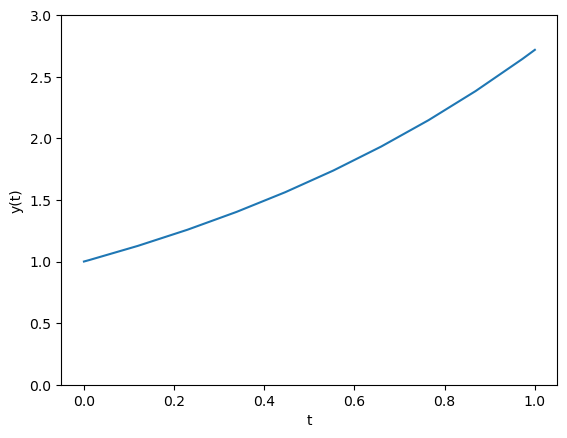

In [26]:
## Plotting
plt.figure(1)
plt.plot(sol.t, sol.y[0,:])
# plt.xlim(0,1)
plt.ylim(0,3)
plt.xlabel('t')
plt.ylabel('y(t)')

BONUS question: What is the analytical solution to this differential equation?

In [27]:
## Complete solution
from sympy import Function, dsolve
from sympy.abc import x
f = Function('f')
eq = f(x).diff(x) - f(x)      
dsolve(eq)                    # Solves for 'eq = 0'

Eq(f(x), C1*exp(x))

In [28]:
## Particular solution
dsolve(eq, ics={f(0): 1})   # solves for 'eq = 0' with boundary condition

Eq(f(x), exp(x))

## Example 2: Solve simple ODE with parameters

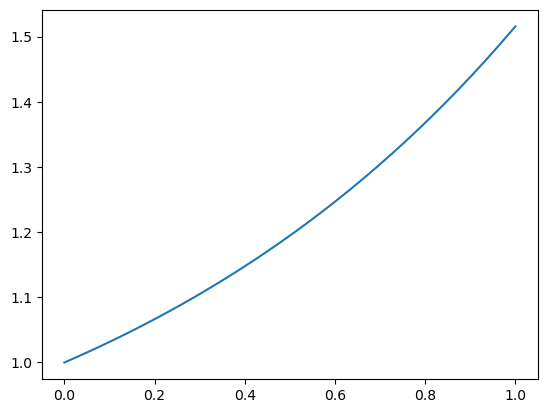

In [36]:
def test_fun2(t,y,par):
    A = par
    dydt = y + A
    return dydt

x0 = [1]            # initial value
A = -0.7            # parameter to be passed in the ODE
tspan = (0,1)       # time span of the simulation
# Solving the ODE:
sol = solve_ivp(test_fun2, t_span = tspan, y0 = x0, args = (A,), method='BDF', atol=1e-10, rtol=1e-10)
# Plotting: 
plt.figure(1)
plt.plot(sol.t, sol.y[0,:])

## Example 3: Solve coupled system of ODEs

c:\Users\jlne\Miniconda3\envs\py39\lib\site-packages\scipy\integrate\_ivp\common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `par`.
  warn("The following arguments have no effect for a chosen solver: {}."


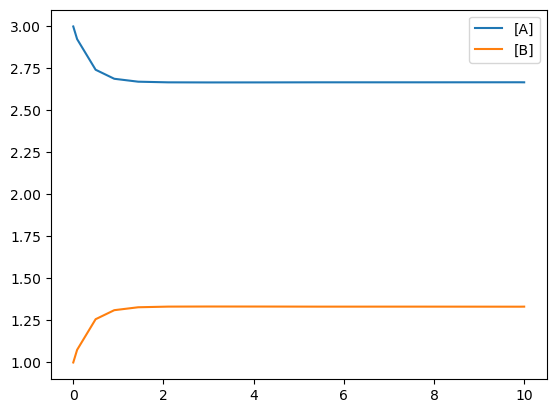

In [41]:
def isomerpar(t,y,par=par):
    y0 = y[0]                           # Variable 1
    y1 = y[1]                           # Variable 2    
    k1 = par[0]                         # Parameter 1
    k2 = par[1]                         # Parameter 2
    dy0dt = -k1*y[0]+k2*y[1]            # ODE 1
    dy1dt = +k1*y[0]-k2*y[1]            # ODE 2
    return dy0dt, dy1dt                 # return ODEs

k1 = 1; k2 = 2
par = [k1, k2]                          # Define parameters in a list
tspan = (0,10)                          # time span as tuple
x0 = [3, 1]                             # initial values as list
# Solve the system of ODEs:
sol = solve_ivp(isomerpar, t_span = tspan, y0 = x0, par = par)
# Plotting:
plt.figure(1)
plt.plot(sol.t, sol.y[0,:], label='[A]')
plt.plot(sol.t, sol.y[1,:], label='[B]')
plt.legend()

## Example 4: Plotting

(-3.0, 3.0)

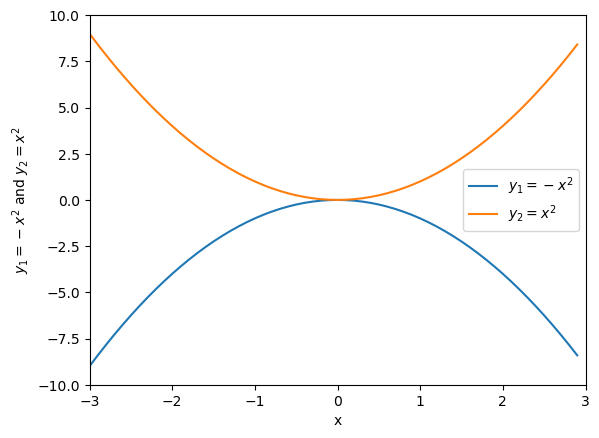

In [43]:
x = np.arange(-3, 3, 0.1)               # Define values for x
y1 = -x**2                              # Define y1 as function of x
y2 = x**2                               # Define y2 as function of x

plt.figure(1)                           # Start plot
plt.plot(x, y1)                         # Plot y1
plt.plot(x, y2)                         # Plot y2
plt.xlabel('x')                         # x-axis label
plt.ylabel('$y_1=-x^2$ and $y_2=x^2$')  # y-axis label
plt.legend(['$y_1=-x^2$','$y_2=x^2$'])  # legend 
plt.ylim(-10,10)                        # y-axis boundaries 
plt.xlim(-3,3)                          # x-axis boundaries

## Example 5: Sub-plot

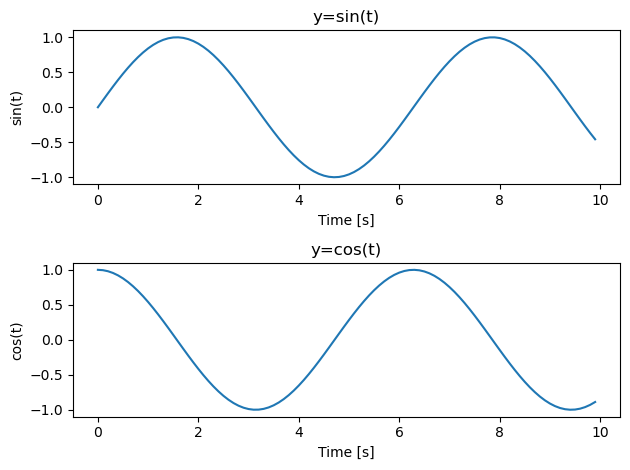

In [87]:
x = np.arange(0,10,0.1)                                             # Define x values
y = np.sin(x); z = np.cos(x)                                        # Define y and z as function of x
fig, ax = plt.subplots(2,1)                                         # Start the subplot with 2 rows and 1 column
ax[0].plot(x,y)                                                     # Plotting y in the first subplot
ax[0].set(title='y=sin(t)', ylabel='sin(t)', xlabel='Time [s]')     # Setting plot parameters for subplot 1
ax[1].plot(x,z)                                                     # Plotting z in the second subplot
ax[1].set(title='y=cos(t)', ylabel='cos(t)', xlabel='Time [s]')     # Setting plot parameters for subplot 2
fig.tight_layout()

## Example 6: Harmonic Signal Simulation 

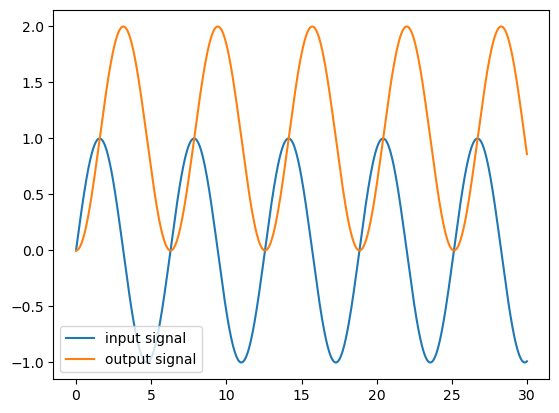

In [47]:
def sine_wave(t, amplitude, bias):              # Defining a sinus wave function with input t and parameters "amplitude" and "bias" 
    return amplitude*np.sin(t)+bias

def integrator(t, dt, y, dy, i):                # Defining an integrator function to integrate any signal
    if i == 0:                                  # Inputs: time, timestep, previous y value, signat to integrate, integration index
        sig = x0                                # At first integration step, the initial value is set
    else:
        sig = y+dy*dt                           # Then, oldschool integration
    return sig



dt = 0.01                                       # Define timestep
time = np.arange(0,30,dt)                       # Define t values in range 0 to 30 with timestep dt

sig = np.zeros(len(time))                       # Initialize the length of the signals as "numpy arrays" (kind of vectors)
sig1 = np.zeros(len(time))
i = 0
x0 = 0                                          # Initial value for the integrator
for t in time:                                  # run the time loop
    sig[i] = sine_wave(t, amplitude=1, bias=0)                          # Input signal "sig" defined as sinus wave with amplitude 1 and bias 0
    sig1[i] = integrator(t, dt, y=sig1[i-1], dy=sig[i-1], i=i)          # second signal "sig1" is the integral of the input signal
    i +=1                                                               # update index
# Plotting the results:
plt.plot(time,sig, label='input signal')
plt.plot(time,sig1, label='output signal')
plt.legend()

## Example 7: Simulating signals with a class structure 

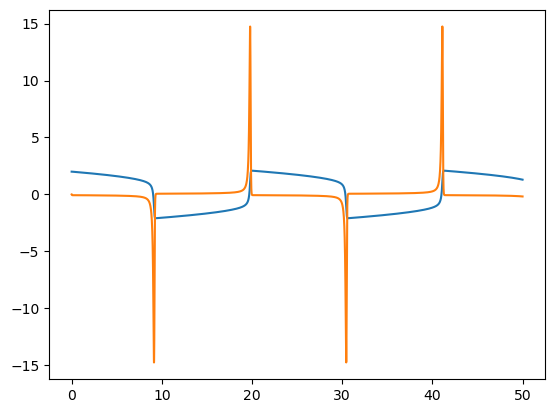

In [167]:
# Define initial condition
x0=[2, 0]
# Define parameter
par=1
# Define input
mu=10
input = mu
# Define the time span and time step of the simulation
dt = 0.01
time= np.arange(0,50,dt)

## Define sfunction
class sfunc:
    def __init__(self, time, input, x0, par, dt):
        '''Here, we call simulation parameters and store them as internal object variables
        The __init__ function is automatically called when defining the class '''
        self.states=np.zeros((len(time),2))         # Initialize shape of the states (here 2 states and one value for each timestep)
        self.output=np.zeros((len(time),2))         # Initialize shape of the output (here 2 states and one value for each timestep)
        self.time = time
        self.dt = dt
        self.input = input
        self.x0 = x0
        self.par = par
    def run(self):
        '''Here, we run the timeloop'''
        i = 0
        for t in self.time:
            if i == 0:
                self.states[0,:] = self.x0
            else:
                self.rates = np.zeros((1,2))
                self.rates[0,0] = self.states[i-1, 1]
                self.rates[0,1] = self.input * (self.par-self.states[i-1, 0]**2)*self.states[i-1, 1]-self.states[i-1, 0]
                self.states[i, 0] = self.states[i-1, 0] + self.rates[0,0] * self.dt
                self.states[i, 1] = self.states[i-1, 1] + self.rates[0,1] * self.dt
            i += 1
    def out(self):
        '''Here, we select the outputs of the block'''
        self.output[:,0] = self.states[:,0] 
        self.output[:,1] = self.states[:,1]
        return self.output

# Call S-function: Initialize, run and extract output
sfunc1 = sfunc(time, input, x0, par, dt)        # Assigning the class "sfunc" to the object "sfunc1", will automatically run the "__init__" function
sfunc1.run()                                    # Call the "run" function of the object
output = sfunc1.out()                           # Call the "out" function of the object and store the results in a variable "output"
# Plotting the results:
plt.plot(time, output)